In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year using polynomial regression
def train_and_predict_polynomial(year, degree=2):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train_poly, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict_polynomial(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Prepare the data
X = pd.get_dummies(data[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
y = data['Democratic %']

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (2nd degree)": make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    return -scores.mean()

# Evaluate each model
model_performance = {name: evaluate_model(model, X, y) for name, model in models.items()}

# Print model performance
for model_name, performance in model_performance.items():
    print(f"{model_name}: MAE = {performance:.4f}")

# Select the best model
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(X, y)

# Predict for a specific year (e.g., 2024)
def predict_democratic_percentage(year, state, gun_ownership, hdi, unemployment):
    state_columns = X.columns[X.columns.str.startswith('State_')]
    state_data = {col: 0 for col in state_columns}
    if f'State_{state}' in state_data:
        state_data[f'State_{state}'] = 1
    
    input_data = {'Year': year, 'Gun ownership %': gun_ownership, 'HDI': hdi, 'Unemployment %': unemployment}
    input_data.update(state_data)
    
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    return best_model.predict(input_df)[0]

# Example prediction
example_prediction = predict_democratic_percentage(2024, 'Alabama', 0.55, 0.87, 0.06)
print(f'Predicted Democratic % for Alabama in 2024: {example_prediction:.4f}')

# Plotting the performance of the best model over the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten(),
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract predictions
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten()
}

# Compile the Stan model
stan_file = 'linear_prior.stan'  # Updated model file name
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Extract prior predictive checks
y_prior = fit.stan_variable('y_prior').mean(axis=0)

# Plot prior predictive distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prior, bins=30, alpha=0.7, label='Prior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Prior Predictive Checks')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values
Gun_ownership = data['Gun ownership %'].values
Unemployment = data['Unemployment %'].values
Democratic_percentage = data['Democratic %'].values # Scaling to percentage

# # Normalize the predictors to [0, 1] range
# scaler = MinMaxScaler()
# HDI_scaled = scaler.fit_transform(HDI)
# Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)
# Unemployment_scaled = scaler.fit_transform(Unemployment)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI,
    'G': Gun_ownership,
    'U': Unemployment,
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract posterior predictive checks
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plot posterior predictive checks
plt.figure(figsize=(10, 6))
plt.hist(y_rep, bins=30, alpha=0.7, label='Posterior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Checks')
plt.legend()
plt.show()

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 2 predictors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel

# Assuming 'data' is your DataFrame with the necessary columns
# Convert Year to int
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression2.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']
    return predicted_votes_test, df_testing['Democratic %'].values

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
all_predicted_votes = []
all_actual_votes = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.extend(predicted)
    all_actual_votes.extend(actual)

# Calculate MAE
all_predicted_votes = np.array(all_predicted_votes)
all_actual_votes = np.array(all_actual_votes)
mae = np.mean(np.abs(all_predicted_votes - all_actual_votes))
print(f"Total MAE: {mae}")

# Plot the results
unique_years = years
mean_predicted_democratic_votes = [np.mean(all_predicted_votes[data['Year'] == year]) for year in unique_years]
mean_democratic_votes = [np.mean(all_actual_votes[data['Year'] == year]) for year in unique_years]

plt.figure(figsize=(10, 6))
plt.plot(unique_years, mean_democratic_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, mean_predicted_democratic_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()


## 3 predictors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return predicted_votes_test, df_testing['Democratic %'].values

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
all_predicted_votes = []
all_actual_votes = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.extend(predicted)
    all_actual_votes.extend(actual)

# Calculate MAE
all_predicted_votes = np.array(all_predicted_votes)
all_actual_votes = np.array(all_actual_votes)
mae = np.mean(np.abs(all_predicted_votes - all_actual_votes))
print(f"Total MAE: {mae}")

# Plot the results
unique_years = years
mean_predicted_democratic_votes = [np.mean(all_predicted_votes[data['Year'] == year]) for year in unique_years]
mean_democratic_votes = [np.mean(all_actual_votes[data['Year'] == year]) for year in unique_years]

plt.figure(figsize=(10, 6))
plt.plot(unique_years, mean_democratic_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, mean_predicted_democratic_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()


## Posterior dla linear_regression

   Year    State  Democratic %  Gun ownership %    HDI  Unemployment %
0  1992  Alabama         0.409            0.552  0.839         0.07525
1  1996  Alabama         0.432            0.568  0.850         0.05208
2  2000  Alabama         0.416            0.538  0.853         0.04625
3  2004  Alabama         0.368            0.516  0.861         0.05575
4  2008  Alabama         0.387            0.503  0.867         0.05883
              Year  Democratic %  Gun ownership %         HDI  Unemployment %
count   408.000000    408.000000       408.000000  408.000000      408.000000
mean   2006.000000      0.470287         0.416353    0.901181        0.057307
std       9.176404      0.109017         0.148615    0.025474        0.018367
min    1992.000000      0.219000         0.000000    0.825000        0.021080
25%    1999.000000      0.399750         0.356750    0.884750        0.044540
50%    2006.000000      0.464500         0.446500    0.902000        0.054585
75%    2013.000000      0.53

17:27:44 - cmdstanpy - INFO - Chain [1] start processing
17:27:44 - cmdstanpy - INFO - Chain [2] start processing
17:27:44 - cmdstanpy - INFO - Chain [3] start processing
17:27:44 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\pnhqdd1t.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

17:27:49 - cmdstanpy - INFO - Chain [2] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 1.952 seconds (Warm-up)
Chain [2] 2.441 seconds (Sampling)
Chain [2] 4.393 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)


17:27:49 - cmdstanpy - INFO - Chain [1] done processing
17:27:49 - cmdstanpy - INFO - Chain [3] done processing


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 2.1 seconds (Warm-up)
Chain [1] 2.453 seconds (Sampling)
Chain [1] 4.553 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 2.024 seconds (Warm-up)
Chain [3] 2.671 seconds (Sampling)
Chain [3] 4.695 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 


17:27:49 - cmdstanpy - INFO - Chain [4] done processing
17:27:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', line 26, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_posterior.stan', l

Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 1.976 seconds (Warm-up)
Chain [4] 2.872 seconds (Sampling)
Chain [4] 4.848 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\model1_posteriorsip9tfrv\model1_posterior-20240701172744_1.csv, C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\model1_posteriorsip9tfrv\model1_posterior-20240701172744_2.csv, C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\model1_posteriorsip9tfrv\model1_posterior-20240701172744_3.csv, C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\model1

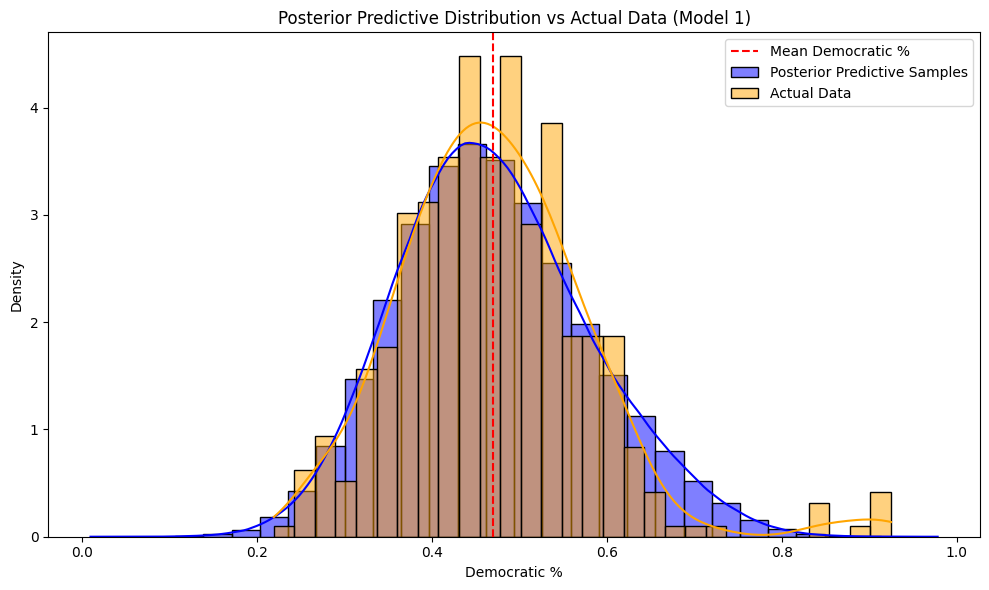

Mean Democratic %: 0.4702867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5
Sample posterior predictive values (first 10): [0.270331 0.336638 0.35353  0.535428 0.383178 0.404105 0.337639 0.435587
 0.325632 0.310418]
Max posterior predictive value: 0.978373
Min posterior predictive value: 0.00936716


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel
import seaborn as sns

# Prepare data for posterior predictive check
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Sprawdź dane
print(data.head())
print(data.describe())

stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'y': data['Democratic %'].values  # Zmiana klucza z 'V' na 'y'
}

# Compile and run the posterior predictive model
stan_file_posterior = 'model1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=47, show_console=True)
print(fit_posterior.diagnose())

# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

# Print some details for inspection
print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

# Inspect a few of the posterior predictive samples
print("Sample posterior predictive values (first 10):", y_rep_posterior_flat[:10])
print("Max posterior predictive value:", np.max(y_rep_posterior_flat))
print("Min posterior predictive value:", np.min(y_rep_posterior_flat))

17:44:40 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model_1_pp.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp.exe
17:45:16 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp.exe
17:45:16 - cmdstanpy - INFO - Chain [1] start processing
17:45:16 - cmdstanpy - INFO - Chain [2] start processing
17:45:16 - cmdstanpy - INFO - Chain [3] start processing
17:45:16 - cmdstanpy - INFO - Chain [4] start processing


Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 1000 (Default)
Chain [2] num_warmup = 1000 (Default)
Chain [2] save_warmup = 0 (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = 1 (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = 0 (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [2] max_depth = 10 (Default)
Chain [2] metric = diag_e (Default)
Chain [3] method = sample (Default)
Chain [2] metric_file =  (Default)
Chain [2] stepsize = 1 (Default)
Chain [2] stepsize_jitter = 0 (Default)
Chain [2] num_chains = 1 (Default)
Chain [2] id = 2
Chain [2] data
Chain [2] file = C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\ikl7prpm.json
Chain [2] init = 2 (Default)
Ch

17:45:17 - cmdstanpy - INFO - Chain [2] done processing
17:45:17 - cmdstanpy - INFO - Chain [4] done processing
17:45:17 - cmdstanpy - INFO - Chain [3] done processing
17:45:17 - cmdstanpy - INFO - Chain [1] done processing


Chain [2] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [4] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [3] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 0.036 seconds (Warm-up)
Chain [2] 0.816 seconds (Sampling)
Chain [2] 0.852 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [4] Iteration: 2000 / 2000

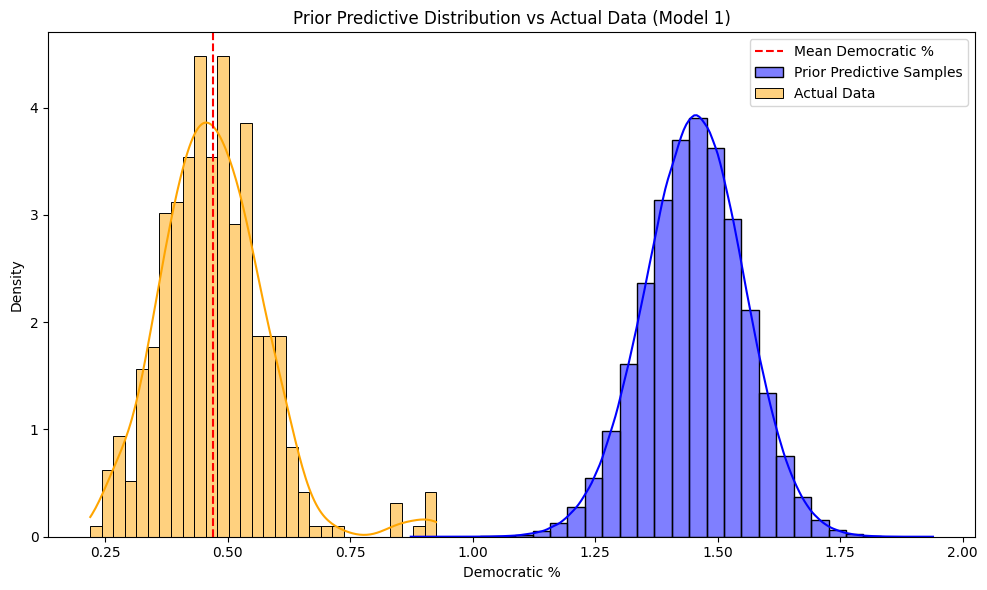

Mean Democratic %: 0.4702867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5
Sample prior predictive values (first 10): [1.5333  1.51712 1.46328 1.53745 1.62832 1.51693 1.50971 1.53298 1.52734
 1.57   ]
Max prior predictive value: 1.93944
Min prior predictive value: 0.873256


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel
import seaborn as sns

# Wczytanie danych
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Przygotowanie danych dla prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Kompilacja i uruchomienie modelu prior predictive
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=4, seed=28052020, show_console=True)

# Wyciągnięcie próbek predykcyjnych
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

# Rysowanie predykcji prior i danych rzeczywistych
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Dodanie linii średniej
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Dostosowanie wykresu
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

# Wydrukowanie szczegółów do inspekcji
print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

# Inspekcja kilku próbek predykcji prior
print("Sample prior predictive values (first 10):", y_rep_prior_flat[:10])
print("Max prior predictive value:", np.max(y_rep_prior_flat))
print("Min prior predictive value:", np.min(y_rep_prior_flat))


             Alpha     Beta_HDI       Beta_G       Beta_U        Sigma
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.470275     0.900235     0.400991     0.059841     0.070181
std       0.048402     0.014899     0.019715     0.005018     0.005017
min       0.312452     0.856370     0.328679     0.043864     0.055128
25%       0.437655     0.890607     0.388161     0.056448     0.066570
50%       0.471527     0.900077     0.400447     0.059638     0.070145
75%       0.501701     0.909748     0.414063     0.063170     0.073659
max       0.629838     0.945752     0.469350     0.075069     0.086529


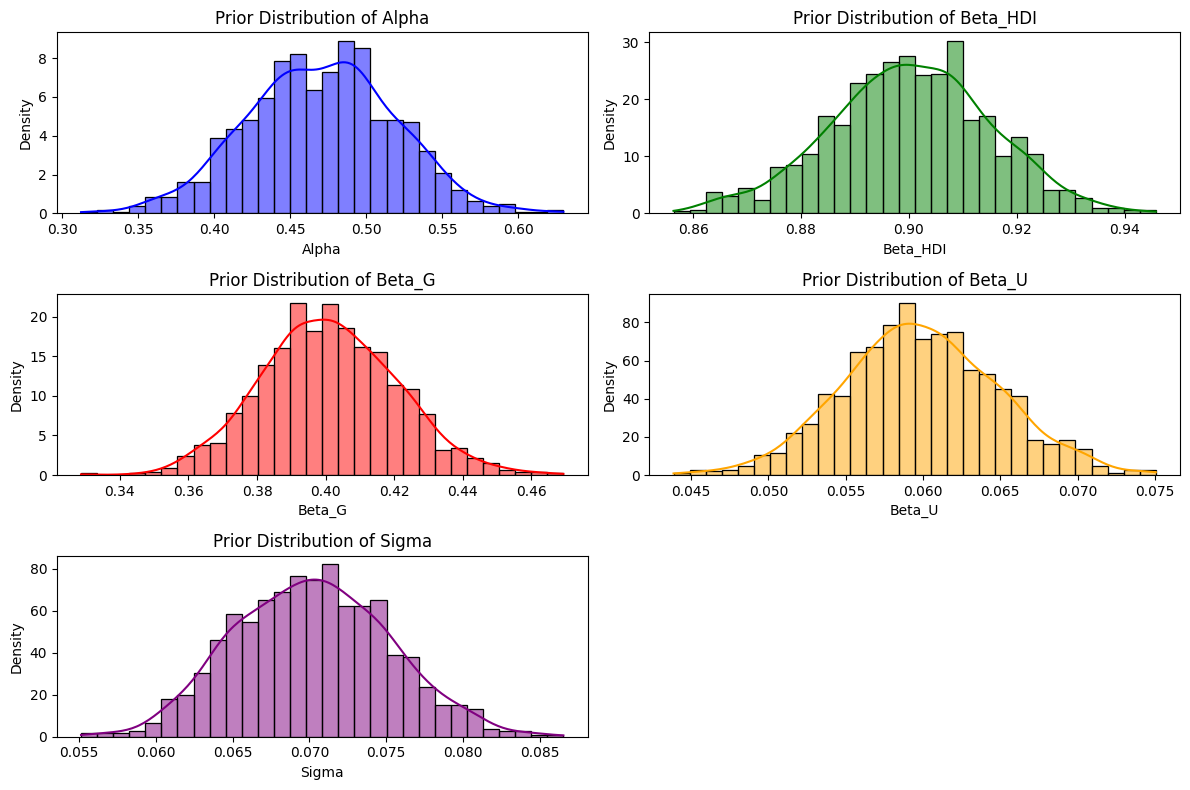

In [13]:
import pandas as pd
import numpy as np

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(0.47, 0.05, n_samples)
beta_HDI_prior = np.random.normal(0.9, 0.015, n_samples)
beta_G_prior = np.random.normal(0.4, 0.02, n_samples)
beta_U_prior = np.random.normal(0.06, 0.005, n_samples)
sigma_prior = np.random.normal(0.07, 0.005, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_HDI_prior,
    'Beta_G': beta_G_prior,
    'Beta_U': beta_U_prior,
    'Sigma': sigma_prior
})

# Print descriptive statistics of the simulated priors
print(priors_df.describe())

# Plot the distributions of the simulated prior values using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

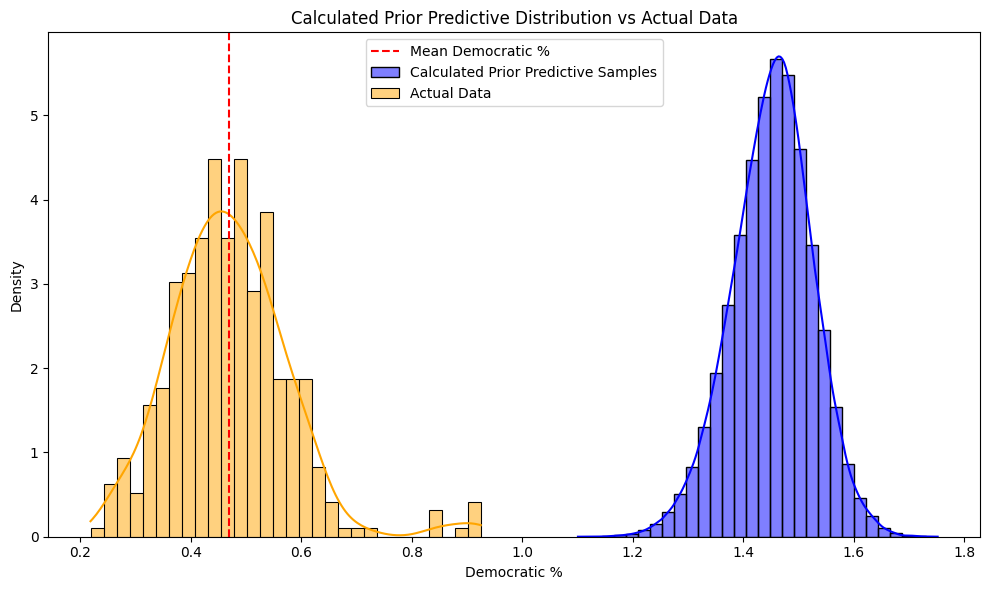

In [14]:
# Przeliczenie predykcji priory
N = len(data)
y_rep_calculated = []
for i in range(n_samples):
    y_rep = alpha_prior[i] + beta_HDI_prior[i] * data['HDI'] + beta_G_prior[i] * data['Gun ownership %'] + beta_U_prior[i] * data['Unemployment %']
    y_rep_calculated.append(y_rep)

# Konwersja do płaskiego wektora
y_rep_calculated_flat = np.concatenate(y_rep_calculated)

# Plot the calculated prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_calculated_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Calculated Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Dodanie linii średniej
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Dostosowanie wykresu
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Calculated Prior Predictive Distribution vs Actual Data')
plt.tight_layout()
plt.show()

18:05:42 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model_1_pp_adjusted.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp_adjusted.exe
18:06:17 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1_pp_adjusted.exe
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [2] start processing
18:06:17 - cmdstanpy - INFO - Chain [3] start processing
18:06:17 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpwp0zjlxo\v8n0j5t4.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [2] done processing
18:06:18 - cmdstanpy - INFO - Chain [3] done processing
18:06:19 - cmdstanpy - INFO - Chain [4] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [3] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.031 seconds (Warm-up)
Chain [1] 0.943 seconds (Sampling)
Chain [1] 0.974 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 0.039 seconds (Warm-up)
Chain [2] 0.949 seconds (Sampling)
Chain [2] 0.988 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [

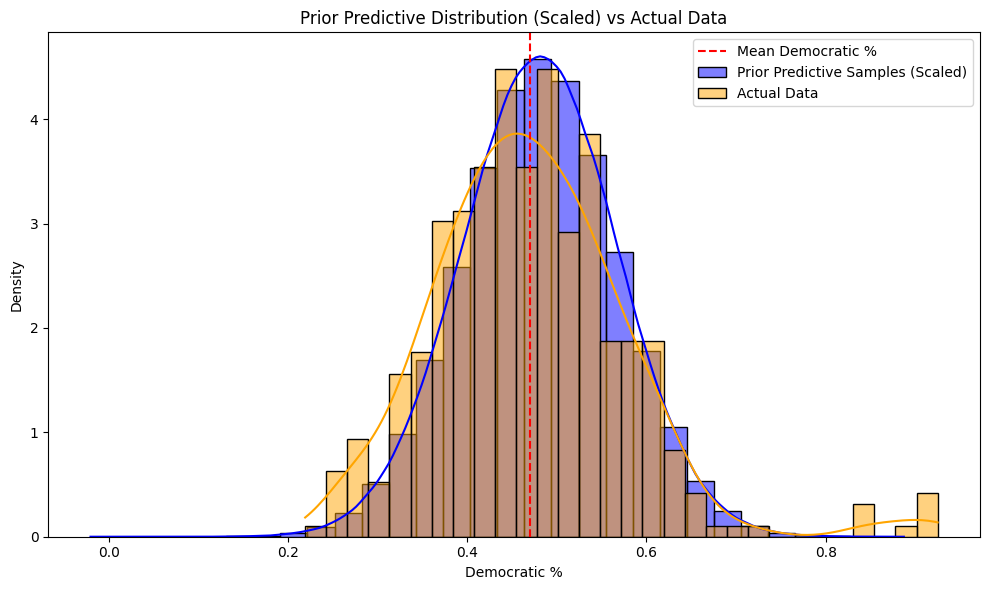

Mean Democratic %: 0.4702867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5
Sample prior predictive values (first 10): [0.564907 0.533605 0.49014  0.56614  0.657105 0.519766 0.51485  0.52906
 0.435808 0.483294]
Max prior predictive value: 0.887335
Min prior predictive value: -0.0205898


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel
import seaborn as sns

# Wczytanie danych
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Skalowanie predyktorów i zmiennej zależnej o współczynnik 0.5
data_scaled = data.copy()
data_scaled['HDI'] *= 0.01
data_scaled['Gun ownership %'] *= 0.01
data_scaled['Unemployment %'] *= 0.01
data_scaled['Democratic %'] *= 0.01

# Przygotowanie danych dla prior predictive check
stan_data_prior_scaled = {
    'N': len(data_scaled),
    'HDI': data_scaled['HDI'].values,
    'G': data_scaled['Gun ownership %'].values,
    'U': data_scaled['Unemployment %'].values
}

# Zapisz kod modelu do pliku
stan_code_prior = """
data {
  int<lower=0> N; // number of observations
  vector[N] HDI; // predictor 1 (HDI)
  vector[N] G; // predictor 2 (Gun ownership %)
  vector[N] U; // predictor 3 (Unemployment %)
}

parameters {
  real alpha;
  real beta_HDI;
  real beta_G;
  real beta_U;
  real<lower=0> sigma;
}

model {
  // Priors
  alpha ~ normal(0.47, 0.05); // Prior for intercept centered at mean Democratic %
  beta_HDI ~ normal(0.9, 0.015); // Prior for HDI coefficient
  beta_G ~ normal(0.4, 0.02); // Prior for Gun Ownership coefficient
  beta_U ~ normal(0.06, 0.005); // Prior for Unemployment coefficient
  sigma ~ normal(0.07, 0.005); // Prior for standard deviation
}

generated quantities {
  vector[N] y_rep;
  for (n in 1:N)
    y_rep[n] = normal_rng(alpha + beta_HDI * HDI[n] + beta_G * G[n] + beta_U * U[n], sigma);
}
"""

with open('model_1_pp_adjusted.stan', 'w') as f:
    f.write(stan_code_prior)

# Kompilacja i uruchomienie modelu prior predictive
stan_file_prior = 'model_1_pp_adjusted.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior_scaled, chains=4, seed=28052020, show_console=True)

# Wyciągnięcie próbek predykcyjnych
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')
y_rep_prior_flat = y_rep_prior.values.flatten()

# Rysowanie predykcji prior i danych rzeczywistych
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples (Scaled)', color='blue')
sns.histplot(data['Democratic %'].values, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Dodanie linii średniej
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Dostosowanie wykresu
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Scaled) vs Actual Data')
plt.tight_layout()
plt.show()

# Wydrukowanie szczegółów do inspekcji
print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

# Inspekcja kilku próbek predykcji prior
print("Sample prior predictive values (first 10):", y_rep_prior_flat[:10])
print("Max prior predictive value:", np.max(y_rep_prior_flat))
print("Min prior predictive value:", np.min(y_rep_prior_flat))

In [23]:
import pandas as pd

# Wczytanie danych
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Przemnożenie wybranych kolumn przez 100
columns_to_scale = ['Democratic %', 'Gun ownership %', 'Unemployment %']
data[columns_to_scale] = data[columns_to_scale] * 100

# Zapisanie nowych danych do nowego pliku
new_file_path = 'data/main_data2.xlsx'
data.to_excel(new_file_path, index=False)

print(f"Dane zostały zapisane do pliku {new_file_path}")

Dane zostały zapisane do pliku data/main_data2.xlsx


Alpha:
count    4000.000000
mean        0.470625
std         0.050806
min         0.293824
25%         0.436682
50%         0.470944
75%         0.505158
max         0.649099
dtype: float64

Beta_HDI:
count    4000.000000
mean        0.900039
std         0.014957
min         0.850907
25%         0.889888
50%         0.900073
75%         0.910122
max         0.951347
dtype: float64

Beta_G:
count    4000.000000
mean        0.399779
std         0.020614
min         0.318683
25%         0.385613
50%         0.399128
75%         0.413087
max         0.484894
dtype: float64

Beta_U:
count    4000.000000
mean        0.060039
std         0.004987
min         0.039667
25%         0.056745
50%         0.060102
75%         0.063377
max         0.076829
dtype: float64

Sigma:
count    4000.000000
mean        0.070064
std         0.004967
min         0.048896
25%         0.066692
50%         0.070043
75%         0.073404
max         0.088854
dtype: float64


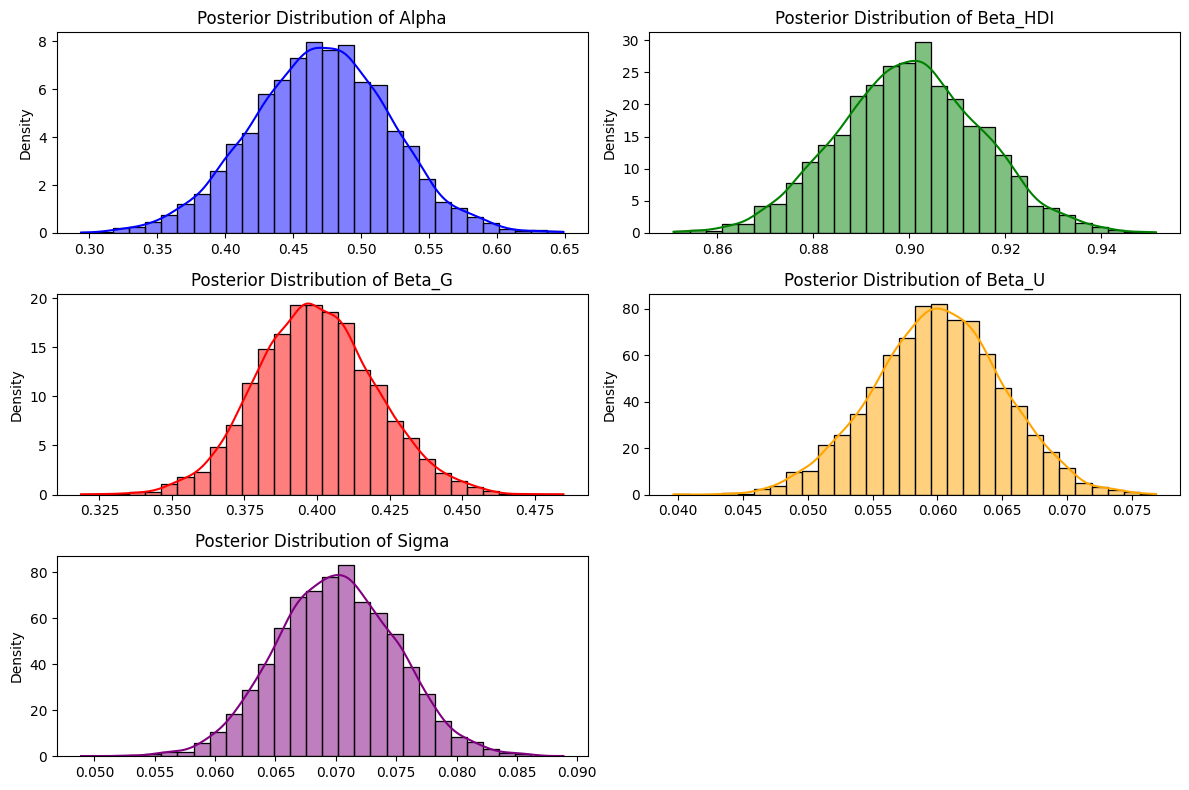

In [16]:
# Sprawdzenie wartości parametrów z modelu Stan
alpha_samples = fit_prior.stan_variable('alpha')
beta_HDI_samples = fit_prior.stan_variable('beta_HDI')
beta_G_samples = fit_prior.stan_variable('beta_G')
beta_U_samples = fit_prior.stan_variable('beta_U')
sigma_samples = fit_prior.stan_variable('sigma')

# Wydrukowanie statystyk parametrów
print("Alpha:")
print(pd.Series(alpha_samples).describe())
print("\nBeta_HDI:")
print(pd.Series(beta_HDI_samples).describe())
print("\nBeta_G:")
print(pd.Series(beta_G_samples).describe())
print("\nBeta_U:")
print(pd.Series(beta_U_samples).describe())
print("\nSigma:")
print(pd.Series(sigma_samples).describe())

# Rysowanie histogramów parametrów
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.histplot(alpha_samples, bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(beta_HDI_samples, bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(beta_G_samples, bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(beta_U_samples, bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Posterior Distribution of Beta_U')
sns.histplot(sigma_samples, bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Posterior Distribution of Sigma')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Sprawdź dane
print(data.describe())

# Zakresy zmiennych
print("Zakresy zmiennych:")
print("HDI:", data['HDI'].min(), "-", data['HDI'].max())
print("Gun ownership %:", data['Gun ownership %'].min(), "-", data['Gun ownership %'].max())
print("Unemployment %:", data['Unemployment %'].min(), "-", data['Unemployment %'].max())
print("Democratic %:", data['Democratic %'].min(), "-", data['Democratic %'].max())

              Year  Democratic %  Gun ownership %         HDI  Unemployment %
count   408.000000    408.000000       408.000000  408.000000      408.000000
mean   2006.000000      0.470287         0.416353    0.901181        0.057307
std       9.176404      0.109017         0.148615    0.025474        0.018367
min    1992.000000      0.219000         0.000000    0.825000        0.021080
25%    1999.000000      0.399750         0.356750    0.884750        0.044540
50%    2006.000000      0.464500         0.446500    0.902000        0.054585
75%    2013.000000      0.532500         0.522250    0.920250        0.068542
max    2020.000000      0.925000         0.705000    0.954000        0.137170
Zakresy zmiennych:
HDI: 0.825 - 0.954
Gun ownership %: 0.0 - 0.705
Unemployment %: 0.02108 - 0.13717000000000001
Democratic %: 0.219 - 0.925


In [ ]:
import seaborn as sns
import arviz as az

# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

In [ ]:
# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Assuming 'data' is your DataFrame with the necessary columns
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict(data, year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
actuals = []
predictions = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(data, year)
    predictions.append(predicted)
    actuals.append(actual)

# Plot the results for Alabama
plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label='Actual Alabama', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label='Predicted Alabama', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage in Alabama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Assuming 'data' is your DataFrame with the necessary columns
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict(data, year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression2.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
actuals = []
predictions = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(data, year)
    predictions.append(predicted)
    actuals.append(actual)

# Plot the results for Alabama
plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label='Actual Alabama', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label='Predicted Alabama', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage in Alabama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'linear_regression.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=53)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean())
    
    return actuals, predictions

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Plot the results for Alabama
state = 'Alabama'
actuals, predictions = train_and_predict_state(state, years)

plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

15:09:51 - cmdstanpy - INFO - CmdStan start processing












































































































































































































































































































































































































chain 1 |██████████| 01:10 Sampling completed                       
chain 2 |██████████| 01:10 Sampling completed                       
chain 3 |██████████| 01:10 Sampling completed                       
chain 4 |██████████| 01:10 Sampling completed                       


15:11:02 - cmdstanpy - INFO - CmdStan done processing.


15:11:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:12:20 - cmdstanpy - INFO - CmdStan done processing.


15:12:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:13:45 - cmdstanpy - INFO - CmdStan done processing.


15:13:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co

15:15:18 - cmdstanpy - INFO - CmdStan done processing.


15:15:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:16:36 - cmdstanpy - INFO - CmdStan done processing.


15:16:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:17:48 - cmdstanpy - INFO - CmdStan done processing.


15:17:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:19:19 - cmdstanpy - INFO - CmdStan done processing.


15:19:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co


15:20:47 - cmdstanpy - INFO - CmdStan done processing.


15:20:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, column 2 to line 40, column 76)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'polynomial_test.stan', line 38, co

Total MAE: 0.05442119297165642


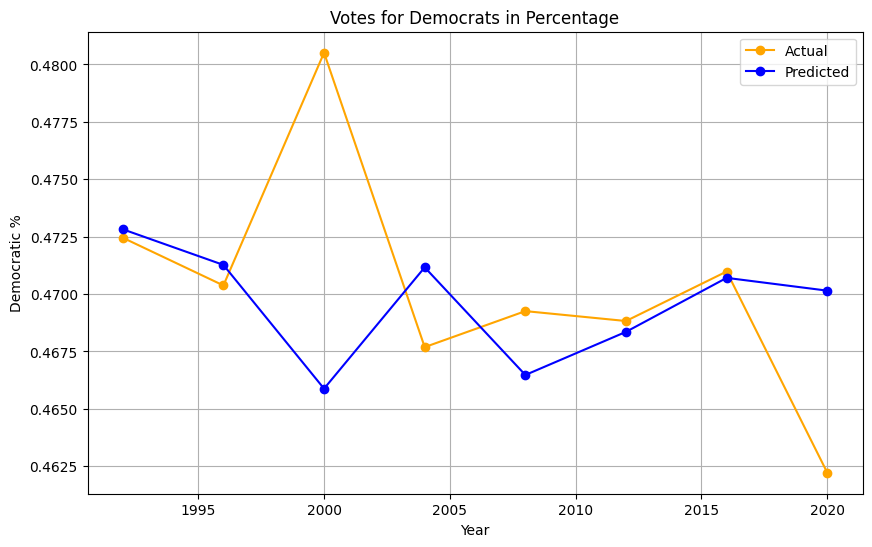

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Function to evaluate model with a specific seed
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3
    )

    return predicted_votes_test

# Prepare the data
stan_file_train = 'polynomial_test.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Define the seed
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    all_predicted_votes.extend(predictions)
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Calculate MAE
all_predicted_votes = np.array(all_predicted_votes)
all_actual_votes = np.array(all_actual_votes)
mae = np.mean(np.abs(all_predicted_votes - all_actual_votes))
print(f"Total MAE: {mae}")

# Plot the results
unique_years = years
mean_predicted_democratic_votes = [np.mean(all_predicted_votes[data['Year'] == year]) for year in unique_years]
mean_democratic_votes = [np.mean(all_actual_votes[data['Year'] == year]) for year in unique_years]

plt.figure(figsize=(10, 6))
plt.plot(unique_years, mean_democratic_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, mean_predicted_democratic_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Poly - 4 stopień

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()
    beta_HDI4_train = fit_train.stan_variable('beta_HDI4').mean()
    beta_G4_train = fit_train.stan_variable('beta_G4').mean()
    beta_U4_train = fit_train.stan_variable('beta_U4').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3 + beta_HDI4_train * data['HDI']**4
        + beta_G4_train * data['Gun ownership %']**4 + beta_U4_train * data['Unemployment %']**4
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    return mean_predicted_democratic_votes

# Przygotuj dane
stan_file_train = 'poly4.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Define the seed
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    all_predicted_votes.extend(predictions)
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Oblicz MAE
all_predicted_votes = np.array(all_predicted_votes)
all_actual_votes = np.array(all_actual_votes)
mae = np.mean(np.abs(all_predicted_votes - all_actual_votes))
print(f"Total MAE: {mae}")

# Plot the results
unique_years = years
mean_predicted_democratic_votes = [np.mean(all_predicted_votes[data['Year'] == year]) for year in unique_years]
mean_democratic_votes = [np.mean(all_actual_votes[data['Year'] == year]) for year in unique_years]

plt.figure(figsize=(10, 6))
plt.plot(unique_years, mean_democratic_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, mean_predicted_democratic_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

15:33:27 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\poly4.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\poly4.exe
15:36:40 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\poly4.exe
15:36:50 - cmdstanpy - INFO - CmdStan start processing












































































































































































































































































































































































































chain 1 |██████████| 02:36 Sampling completed                       
chain 2 |██████████| 02:36 Sampling completed      


15:39:26 - cmdstanpy - INFO - CmdStan done processing.


15:39:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:42:44 - cmdstanpy - INFO - CmdStan done processing.


15:42:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:45:28 - cmdstanpy - INFO - CmdStan done processing.


15:45:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:47:51 - cmdstanpy - INFO - CmdStan done processing.


15:47:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:50:29 - cmdstanpy - INFO - CmdStan done processing.


15:50:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:53:06 - cmdstanpy - INFO - CmdStan done processing.


15:53:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:55:56 - cmdstanpy - INFO - CmdStan done processing.


15:55:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter


15:58:52 - cmdstanpy - INFO - CmdStan done processing.


15:58:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly4.stan', line 59, column 2 to line 62, column 95)
Exception: normal_lpdf: Scale parameter 

Total MAE: 0.023195972801646023


IndexError: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 408

: 

## Poly with L2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

# Przygotuj dane
stan_file_train = 'poly_l2.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Definiowanie seeda
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mse, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MSE for {year} with seed {seed}: {mse}")
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Wyświetlenie wyników
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## L2 z MAE i R2 a nie MSE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from sklearn.metrics import mean_absolute_error, r2_score

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mae = mean_absolute_error(mean_democratic_votes, mean_predicted_democratic_votes)
    r2 = r2_score(mean_democratic_votes, mean_predicted_democratic_votes)
    
    return mae, r2, mean_predicted_democratic_votes

# Przygotuj dane
stan_file_train = 'polynomial_test_with_regularization.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []
all_mae = []
all_r2 = []

# Definiowanie seeda
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mae, r2, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MAE for {year} with seed {seed}: {mae}")
    print(f"R^2 for {year} with seed {seed}: {r2}")
    all_mae.append(mae)
    all_r2.append(r2)
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Wyświetlenie wyników
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## poly with L1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from sklearn.metrics import mean_absolute_error, r2_score

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()
    beta_HDI3_train = fit_train.stan_variable('beta_HDI3').mean()
    beta_G3_train = fit_train.stan_variable('beta_G3').mean()
    beta_U3_train = fit_train.stan_variable('beta_U3').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
        + beta_HDI3_train * data['HDI']**3 + beta_G3_train * data['Gun ownership %']**3
        + beta_U3_train * data['Unemployment %']**3
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mae = mean_absolute_error(mean_democratic_votes, mean_predicted_democratic_votes)
    r2 = r2_score(mean_democratic_votes, mean_predicted_democratic_votes)
    
    return mae, r2, mean_predicted_democratic_votes

# Przygotuj dane
stan_file_train = 'poly_l1.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []
all_mae = []
all_r2 = []

# Definiowanie seeda
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mae, r2, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MAE for {year} with seed {seed}: {mae}")
    print(f"R^2 for {year} with seed {seed}: {r2}")
    all_mae.append(mae)
    all_r2.append(r2)
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Wyświetlenie wyników
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Poly - 2 stopnia

14:53:48 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\poly2.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\poly2.exe
14:56:28 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\poly2.exe
14:56:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:08 Ite


14:57:05 - cmdstanpy - INFO - CmdStan done processing.
14:57:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 

14:57:09 - cmdstanpy - INFO - CmdStan start processing


MAE for 1992 with seed 47: 0.007255760450515458


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:07 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:10 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:11 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:12 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 


14:57:29 - cmdstanpy - INFO - CmdStan done processing.
14:57:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 

14:57:33 - cmdstanpy - INFO - CmdStan start processing


MAE for 1996 with seed 47: 0.03072716895119293


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:07 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:10 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:11 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |███████▎  |


14:57:56 - cmdstanpy - INFO - CmdStan done processing.
14:57:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 

14:58:00 - cmdstanpy - INFO - CmdStan start processing


MAE for 2000 with seed 47: 0.005358965727505882


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:03 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:09 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:11 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:14 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |███████▋  | 00:15 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |


14:58:21 - cmdstanpy - INFO - CmdStan done processing.


14:58:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter 

MAE for 2004 with seed 47: 0.022526605648274134


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:07 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:08 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:09 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:10 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:11 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  |


14:58:52 - cmdstanpy - INFO - CmdStan done processing.


14:58:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter 

MAE for 2008 with seed 47: 0.02539013316178179


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:06 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:07 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:08 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:08 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:09 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:15


14:59:32 - cmdstanpy - INFO - CmdStan done processing.


14:59:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter 

MAE for 2012 with seed 47: 0.008188233326195726


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:08 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:10 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:19 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  | 00:21 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████


15:00:14 - cmdstanpy - INFO - CmdStan done processing.


15:00:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter 

MAE for 2016 with seed 47: 0.04876128680248892


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:10 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:11 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:11 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:13 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 0


15:00:47 - cmdstanpy - INFO - CmdStan done processing.


15:00:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'poly2.stan', line 32, column 2 to line 33, column 95)
	Exception: normal_lpdf: Scale parameter 

MAE for 2020 with seed 47: 0.02319112296306053


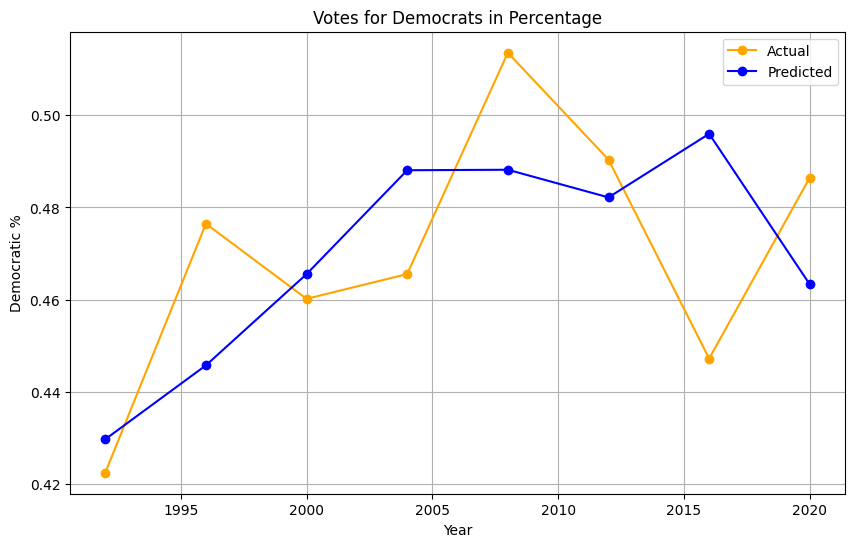

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()
    beta_HDI2_train = fit_train.stan_variable('beta_HDI2').mean()
    beta_G2_train = fit_train.stan_variable('beta_G2').mean()
    beta_U2_train = fit_train.stan_variable('beta_U2').mean()

    predicted_votes_test = (
        alpha_train + beta_HDI_train * data['HDI'] + beta_G_train * data['Gun ownership %']
        + beta_U_train * data['Unemployment %'] + beta_HDI2_train * data['HDI']**2 
        + beta_G2_train * data['Gun ownership %']**2 + beta_U2_train * data['Unemployment %']**2
    )

    mean_predicted_democratic_votes = predicted_votes_test.groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mae = np.mean(np.abs(mean_predicted_democratic_votes - mean_democratic_votes))
    
    return mae, mean_predicted_democratic_votes

# Przygotuj dane
stan_file_train = 'poly2.stan'
model = CmdStanModel(stan_file=stan_file_train)

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Define the seed
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mae, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MAE for {year} with seed {seed}: {mae}")
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Plot the results
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Spline model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import patsy

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean(axis=0)
    beta_G_train = fit_train.stan_variable('beta_G').mean(axis=0)
    beta_U_train = fit_train.stan_variable('beta_U').mean(axis=0)

    B_HDI_test = patsy.build_design_matrices([design_info_HDI], data)[0]
    B_G_test = patsy.build_design_matrices([design_info_G], data)[0]
    B_U_test = patsy.build_design_matrices([design_info_U], data)[0]

    predicted_votes_test = (
        alpha_train + np.dot(np.asarray(B_HDI_test), beta_HDI_train) + np.dot(np.asarray(B_G_test), beta_G_train) + np.dot(np.asarray(B_U_test), beta_U_train)
    )

    mean_predicted_democratic_votes = pd.Series(predicted_votes_test).groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

# Przygotowanie danych splajnów B
K = 10  # liczba węzłów splajnu B
y, X_HDI = patsy.dmatrices('HDI ~ bs(HDI, df=K, degree=3) - 1', data)
y, X_G = patsy.dmatrices('Q("Gun ownership %") ~ bs(Q("Gun ownership %"), df=K, degree=3) - 1', data)
y, X_U = patsy.dmatrices('Q("Unemployment %") ~ bs(Q("Unemployment %"), df=K, degree=3) - 1', data)

# Zapisanie informacji o splajnach do późniejszego użytku
design_info_HDI = X_HDI.design_info
design_info_G = X_G.design_info
design_info_U = X_U.design_info

stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values,
    'K': K,
    'B_HDI': np.asarray(X_HDI),
    'B_G': np.asarray(X_G),
    'B_U': np.asarray(X_U)
}

stan_file_train = 'spline_model.stan'
model = CmdStanModel(stan_file=stan_file_train)

# Definiowanie lat
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Definiowanie seeda
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    # Przygotowanie danych dla STAN
    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values,
        'K': K,
        'B_HDI': np.asarray(patsy.build_design_matrices([design_info_HDI], df_training)[0]),
        'B_G': np.asarray(patsy.build_design_matrices([design_info_G], df_training)[0]),
        'B_U': np.asarray(patsy.build_design_matrices([design_info_U], df_training)[0])
    }

    mse, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MSE for {year} with seed {seed}: {mse}")
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Wyświetlenie wyników
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data['Year'] = data['Year'].astype(int)

# Funkcja do oceny modelu z określonym seedem
def evaluate_model_with_seed(seed, data, model, stan_data_train):
    fit_train = model.sample(data=stan_data_train, chains=4, seed=seed)
    alpha_train = fit_train.stan_variable('alpha').mean()
    
    predicted_votes_test = alpha_train + fit_train.stan_variable('y_rep').mean(axis=0)
    
    mean_predicted_democratic_votes = pd.Series(predicted_votes_test).groupby(data['Year']).mean().values

    mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values 

    mse = np.mean((mean_predicted_democratic_votes - mean_democratic_votes) ** 2)
    
    return mse, mean_predicted_democratic_votes

stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

stan_file_train = 'gp_model.stan'
model = CmdStanModel(stan_file=stan_file_train)

# Definiowanie lat
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

# Definiowanie seeda
seed = 47

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    mse, predictions = evaluate_model_with_seed(seed, df_testing, model, stan_data_train)
    print(f"MSE for {year} with seed {seed}: {mse}")
    all_predicted_votes.append(predictions.mean())
    all_actual_votes.append(df_testing['Democratic %'].mean())

# Wyświetlenie wyników
unique_years = years
plt.figure(figsize=(10, 6))
plt.plot(unique_years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(unique_years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import pymc3 as pm
import numpy as np

# Przygotowanie danych
X = data[['Gun ownership %', 'HDI', 'Unemployment %']]
y = data['Democratic %']

# Normalizacja danych (opcjonalnie, aby model lepiej konwergował)
X = (X - X.mean()) / X.std()

# Model bayesowski
with pm.Model() as model:
    # Priory
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
    beta_2 = pm.Normal('beta_2', mu=0, sigma=10)
    beta_3 = pm.Normal('beta_3', mu=0, sigma=10)
    
    # Model liniowy
    mu = intercept + beta_1 * X['Gun ownership %'] + beta_2 * X['HDI'] + beta_3 * X['Unemployment %']
    
    # Obserwacje
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    # Inferencja
    trace = pm.sample(2000, return_inferencedata=False)

# Podsumowanie wyników
summary = pm.summary(trace)
summary

ModuleNotFoundError: No module named 'pymc3'

## Rozkłady

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dane
data_values = [
    0.552, 0.568, 0.538, 0.516, 0.503, 0.543, 0.528, 0.555, 0.685, 0.663, 0.601, 0.58,
    0.613, 0.607, 0.572, 0.645, 0.547, 0.449, 0.427, 0.368, 0.382, 0.415, 0.36, 0.463,
    0.533, 0.58, 0.542, 0.544, 0.508, 0.544, 0.518, 0.572, 0.402, 0.291, 0.274, 0.203,
    0.175, 0.214, 0.163, 0.283, 0.483, 0.465, 0.467, 0.411, 0.402, 0.414, 0.379, 0.451,
    0.375, 0.238, 0.202, 0.166, 0.192, 0.183, 0.188, 0.236, 0.378, 0.392, 0.352, 0.331,
    0.263, 0.308, 0.387, 0.344, 0.0, 0.0, 0.0, 0.0, 0.01, 0.03, 0.05, 0.07, 0.426, 0.364,
    0.32, 0.234, 0.303, 0.309, 0.288, 0.353, 0.569, 0.52, 0.467, 0.43, 0.395, 0.401, 0.377,
    0.492, 0.192, 0.146, 0.124, 0.2, 0.099, 0.12, 0.091, 0.149, 0.666, 0.601, 0.609, 0.557,
    0.543, 0.552, 0.578, 0.601, 0.324, 0.288, 0.286, 0.226, 0.205, 0.266, 0.226, 0.278,
    0.505, 0.479, 0.444, 0.391, 0.374, 0.432, 0.424, 0.448, 0.463, 0.451, 0.477, 0.423,
    0.396, 0.409, 0.385, 0.436, 0.539, 0.505, 0.469, 0.428, 0.421, 0.455, 0.423, 0.489,
    0.576, 0.551, 0.553, 0.52, 0.499, 0.514, 0.525, 0.546, 0.565, 0.468, 0.505, 0.491,
    0.492, 0.551, 0.523, 0.531, 0.539, 0.478, 0.466, 0.411, 0.462, 0.46, 0.477, 0.468,
    0.413, 0.283, 0.265, 0.236, 0.235, 0.213, 0.167, 0.302, 0.204, 0.155, 0.126, 0.104,
    0.096, 0.111, 0.09, 0.147, 0.427, 0.429, 0.401, 0.384, 0.315, 0.391, 0.389, 0.402,
    0.456, 0.464, 0.447, 0.406, 0.386, 0.382, 0.391, 0.428, 0.56, 0.59, 0.536, 0.53, 0.497,
    0.568, 0.541, 0.558, 0.478, 0.485, 0.461, 0.451, 0.487, 0.511, 0.528, 0.488, 0.638,
    0.654, 0.646, 0.62, 0.69, 0.658, 0.65, 0.663, 0.471, 0.504, 0.486, 0.466, 0.34, 0.416,
    0.392, 0.452, 0.582, 0.519, 0.471, 0.392, 0.371, 0.377, 0.329, 0.473, 0.483, 0.441,
    0.391, 0.315, 0.368, 0.394, 0.463, 0.411, 0.213, 0.122, 0.108, 0.108, 0.088, 0.07,
    0.089, 0.147, 0.496, 0.488, 0.438, 0.391, 0.357, 0.403, 0.359, 0.462, 0.256, 0.193,
    0.197, 0.174, 0.142, 0.154, 0.145, 0.199, 0.529, 0.516, 0.426, 0.383, 0.345, 0.379,
    0.371, 0.458, 0.574, 0.566, 0.55, 0.546, 0.586, 0.561, 0.533, 0.551, 0.462, 0.397,
    0.351, 0.328, 0.365, 0.362, 0.419, 0.3, 0.549, 0.537, 0.558, 0.495, 0.508, 0.563,
    0.549, 0.547, 0.572, 0.542, 0.516, 0.407, 0.436, 0.476, 0.414, 0.508, 0.474, 0.371,
    0.391, 0.356, 0.384, 0.38, 0.402, 0.407, 0.246, 0.178, 0.153, 0.116, 0.092, 0.109,
    0.139, 0.148, 0.533, 0.493, 0.492, 0.436, 0.42, 0.459, 0.45, 0.494, 0.55, 0.582, 0.547,
    0.567, 0.51, 0.568, 0.55, 0.553, 0.581, 0.518, 0.489, 0.472, 0.495, 0.478, 0.469, 0.516,
    0.522, 0.491, 0.417, 0.368, 0.367, 0.426, 0.355, 0.457, 0.489, 0.481, 0.505, 0.442,
    0.355, 0.423, 0.397, 0.468, 0.601, 0.521, 0.47, 0.442, 0.4, 0.482, 0.503, 0.505, 0.553,
    0.49, 0.418, 0.384, 0.372, 0.397, 0.353, 0.446, 0.487, 0.458, 0.402, 0.369, 0.38, 0.339,
    0.321, 0.421, 0.632, 0.589, 0.541, 0.556, 0.575, 0.571, 0.6, 0.585, 0.467, 0.475, 0.466,
    0.416, 0.421, 0.44, 0.471, 0.453, 0.705, 0.686, 0.586, 0.607, 0.64, 0.597, 0.607, 0.662
]

# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [ ]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['Democratic %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [ ]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['HDI'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [ ]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['Unemployment %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Przygotowanie danych
X = data[['HDI', 'Gun ownership %', 'Unemployment %']]
y = data['Democratic %']

# Dodanie stałej (intercept)
X = sm.add_constant(X)

# Dopasowanie modelu liniowego
model = sm.OLS(y, X).fit()

# Wyświetlenie podsumowania modelu
print(model.summary())

# Obliczenie reszt
residuals = model.resid

# Obliczenie wariancji resztowej
residual_variance = np.var(residuals, ddof=1)

# Obliczenie odchylenia standardowego szumu (sigma)
sigma = np.sqrt(residual_variance)

print(f"Estimated sigma: {sigma}")

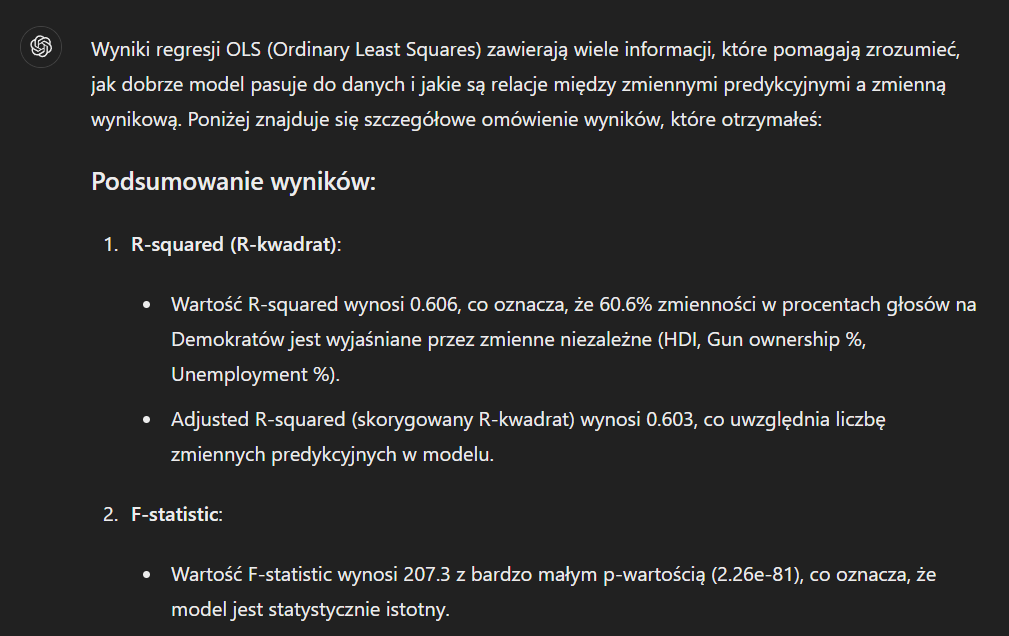
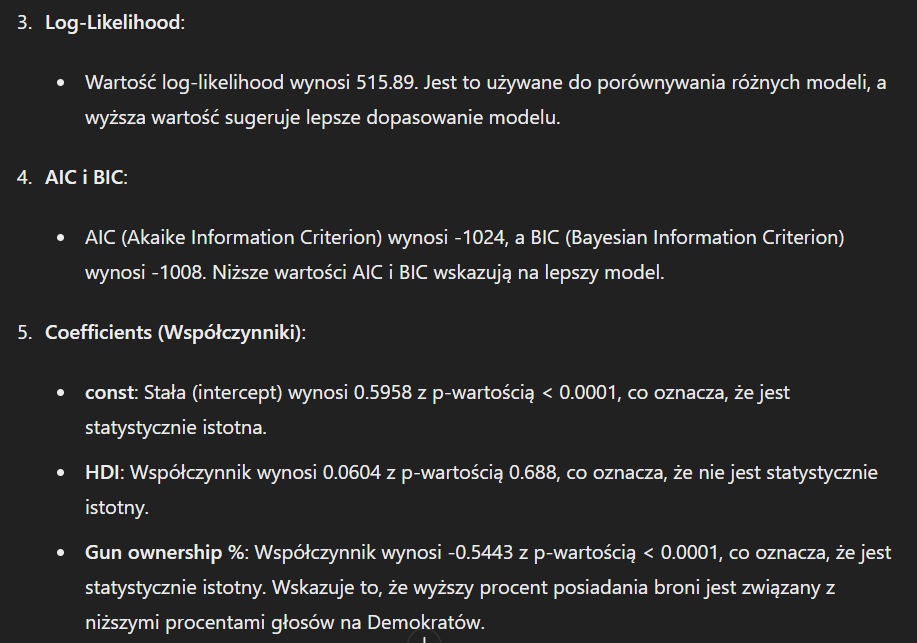
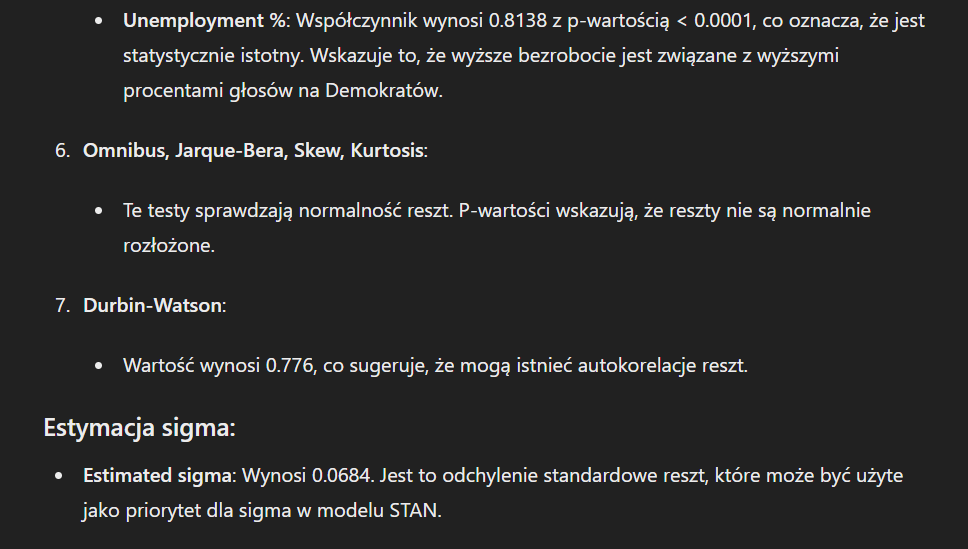